In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
#%matplotlib notebook
#import seaborn as sns


#import plotly.graph_objects as go

import pandas as pd
import numpy as np
import os
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
#mouse_drug_data_to_load = "data/mouse_drug_data.csv"

mouse_drug_data_path = os.path.join("data","mouse_drug_data.csv")
mouse_drug_data = pd.read_csv(mouse_drug_data_path)


#clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

clinical_trial_data_path = os.path.join("data","clinicaltrial_data.csv")
clinical_trial_data = pd.read_csv(clinical_trial_data_path)
# Read the Mouse and Drug Data 
#mouse_drug_data.head()
#Read Clinical Trial Dat
#clinical_trial_data.head()

In [2]:
# Combine the data into a single dataset
# Merging "Mouse and Drug Data"  and  "Clinical Trial Data" using merge

MouseDrug_ClinicalTrial = pd.merge(clinical_trial_data,mouse_drug_data,on ="Mouse ID",how="left")
MouseDrug_ClinicalTrial.head()  # Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [3]:
# Replace all NaN values with 0 
MouseDrug_ClinicalTrial =MouseDrug_ClinicalTrial.fillna(0)

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

drug_trial_groupby = MouseDrug_ClinicalTrial.groupby(["Drug","Timepoint"])
#drug_trial_groupby.count()

drug_trial_mean = drug_trial_groupby["Tumor Volume (mm3)"].mean()  
drug_trial_mean

# Convert to DataFrame

drug_trail_df = pd.DataFrame({
         "Tumor Volume (mm3)": drug_trial_mean          
})            

# Preview DataFrame

drug_trail_reset_index = drug_trail_df.reset_index() 


drug_trail_reset_index  = drug_trail_reset_index.style.format({'B': "{:0<4.0f}", 'D': '{:+.2f}'})
drug_trail_reset_index  # displaying mean Tumor volumes categrized by drugs and timepoint

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45
1,Capomulin,5,44.2661
2,Capomulin,10,43.0843
3,Capomulin,15,42.0643
4,Capomulin,20,40.7163
5,Capomulin,25,39.9395
6,Capomulin,30,38.7693
7,Capomulin,35,37.8168
8,Capomulin,40,36.958
9,Capomulin,45,36.2361


In [4]:
drug_trial_grpby = MouseDrug_ClinicalTrial.groupby(['Drug','Timepoint'])
drug_trial_grpby.count()

#drug_trial_std_err = drug_trial_grpby.sem()
#drug_trail_std_err

# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

std_err_tumor_vols = drug_trial_grpby["Tumor Volume (mm3)"].sem()
std_err_tumor_vols

# column standard deviation  of the dataframe
#df.std(axis=0, skipna = False)
#Passing the argument of axis=0 returns the mean of every single column in the DataFrame

#convert to dataframe

std_err_df = pd.DataFrame({
          "Tumor Volume (mm3)": std_err_tumor_vols
})

std_err_rst_inx = std_err_df.reset_index()

std_err_rst_inx.head() # Preview DataFrame

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
drug_trail_data = drug_trail_df.reset_index()

#drug_trail_data_munging.set_index("Timepoint") ---- #Data mapping
drug_trail_data_munging = drug_trail_data.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")

# Preview that Reformatting worked

drug_trail_data_munging.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [6]:
# Data mapping for standard errors 
se_data_mapping=std_err_rst_inx.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
se_data_mapping.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


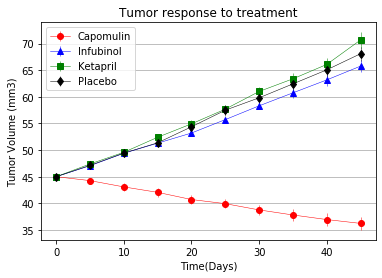

In [7]:
mdct = drug_trail_df.reset_index()
graph_drugs = ['Capomulin','Infubinol','Ketapril','Placebo']
symbols = ['o','^','s','d']
drug_colors = ['red','blue','green','black']

#time_period = 45
#x_axis = np.arange(0,time_period+1,10)  #(0,46,10)

#min = mdct['Tumor Volume (mm3)'].min()
#max = mdct['Tumor Volume (mm3)'].max()

#for i in range(len(graph_drugs)):
#    y_axis = drug_trail_data_munging[graph_drugs[i]]
#    plt.scatter(x_axis,y_axis,marker = symbols[i],color=drug_colors[i])
#plt.xlim(-0.75,time_period+10)
#plt.ylim(min-5,max+5)

#plt.errorbar(trip.index, 'gas', yerr='std', data=trip)

for i in range(len(graph_drugs)):
    y_axis = drug_trail_data_munging[graph_drugs[i]]
    yerr=se_data_mapping[graph_drugs[i]]
    plt.errorbar(drug_trail_data_munging.index,y_axis,yerr,marker = symbols[i],color=drug_colors[i],label = graph_drugs[i],linewidth=0.5)
        
            
#se_list = []
#for i in range(len(graph_drugs)):
#    for j in range(len(std_err_rst_inx)):
#        if graph_drugs[i] == std_err_rst_inx.iloc[j,0] :
#            se_list.append(std_err_rst_inx.iloc[j,2])
#            y_axis = drug_trail_data_munging[graph_drugs[i]]
#            plt.errorbar(drug_trail_data_munging.index,y_axis,yerr=se_list,marker = symbols[i],color=drug_colors[i],label = graph_drugs[i])
#            se_list[:] = []
          

plt.grid(axis='y')
plt.title("Tumor response to treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc = 'best')

#Save the figure
plt.savefig("..\Images\Tumor_response.png")

#show the figure
plt.show()

In [8]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

metastatic_grpby = MouseDrug_ClinicalTrial.groupby(["Drug","Timepoint"])
#metastatic_grpby.count()

metastat_mean = metastatic_grpby["Metastatic Sites"].mean()
#metastat_mean

# Convert to DataFrame
metastat_df = pd.DataFrame({
      "Metastatic Sites": metastat_mean
})
# Preview DataFrame
metastat_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_grpby = MouseDrug_ClinicalTrial.groupby(["Drug","Timepoint"])
#metastatic_grpby.count()
meta_stat_std_err = metastatic_grpby["Metastatic Sites"].sem()
meta_stat_std_err 
# Convert to DataFrame

meta_stat_se_df = pd.DataFrame({
     "Metastatic Sites": meta_stat_std_err 
})

# Preview DataFrame
meta_stat_se_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
meta_stat_mean = metastat_df.reset_index()
# Preview that Reformatting worked
meta_stat_pivot = meta_stat_mean.pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")
meta_stat_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
#Data mapping for standard error of Metastatic sites
ms = meta_stat_se_df.reset_index()
meta_se_data_mapping = ms.pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")
meta_se_data_mapping.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


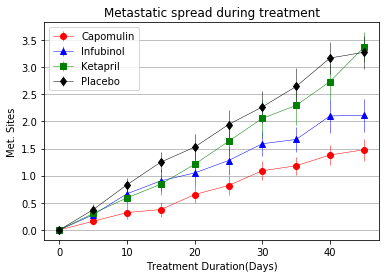

In [13]:
graph_drugs = ['Capomulin','Infubinol','Ketapril','Placebo']
symbols = ['o','^','s','d']
drug_colors = ['red','blue','green','black']

#time_period = 45
#x_axis = np.arange(0,time_period+1,5)  #(0,46,10)
#x_axis

# Generate the Plot (with Error Bars)

for i in range(len(graph_drugs)):
    y_axis = meta_stat_pivot[graph_drugs[i]]
    yerr = meta_se_data_mapping[graph_drugs[i]]
    plt.errorbar(meta_stat_pivot.index,y_axis,yerr,marker = symbols[i],color=drug_colors[i],label = graph_drugs[i],linewidth=0.5)
    #plt.scatter(x_axis,y_axis,marker = symbols[i],color=drug_colors[i],linewidth=1,linestyle='-')  

plt.grid(axis='y')
plt.legend(loc='best')

#plt.xlim(0,time_period+1)
#plt.ylim(0.0,3.5)

plt.title("Metastatic spread during treatment")
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Met. Sites")
# Save the Figure
plt.savefig("..\Images\Metastatic_response.png")
# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
MD_CT_grpby = MouseDrug_ClinicalTrial.groupby(["Drug","Timepoint"])
mice_count=MD_CT_grpby["Mouse ID"].count()
mice_count
# Convert to DataFrame
mice_df = pd.DataFrame({
    "Mouse Count": mice_count
})
# Preview DataFrame
mice = mice_df.reset_index()
mice.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames  #Data mapping
mice_pivot = mice.pivot(index = "Timepoint",columns = "Drug",values="Mouse Count")
# Preview the Data Frame
mice_pivot.head()

#mice_pivot[graph_drugs[0]][0]

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


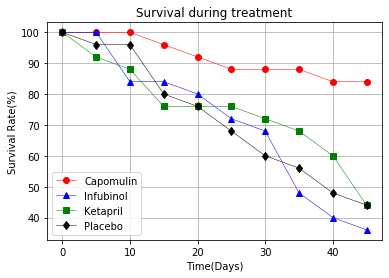

In [16]:
graph_drugs = ['Capomulin','Infubinol','Ketapril','Placebo']
symbols = ['o','^','s','d']
drug_colors = ['red','blue','green','black']

# Generate the Plot (Accounting for percentages)

for i in range(len(graph_drugs)):
    
    mice_total = mice_pivot[graph_drugs[i]][0] # total mice tested
    survival_per = (mice_pivot[graph_drugs[i]]/mice_total)*100 
    y_axis = survival_per
    #plt.scatter(x_axis,y_axis,marker = symbols[i],color=drug_colors[i],ls='--',linewidth=0.5,label=graph_drugs[i])
    plt.errorbar(mice_pivot.index,y_axis,marker = symbols[i],color=drug_colors[i],label = graph_drugs[i],linewidth = 0.5)
    
  
#plt.xlim(0,time_period+1)
#plt.ylim(30,105)
plt.legend(loc='best')
plt.title("Survival during treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate(%)")
plt.grid()

plt.savefig("..\Images\Survival_Rate.png") # Save the Figure
plt.show() # Show the Figure



![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [17]:
mdct = drug_trail_df.reset_index()
drug_name = mdct["Drug"].unique()
drug_name 
len(drug_name)

#drug_name[9]
#for i in range(len(drug_name)):
#    print(i)
max_timept = mdct["Timepoint"].max()
min_timept = mdct["Timepoint"].min()

In [18]:
# Calculate the percent changes for each drug

tumvol_min = []
tumvol_max = []
per_change_means = []


# calculating percentage change for each drug

for i in range(len(drug_name)):         # iterating through array of drug names
    zero_row = mdct.loc[(mdct["Timepoint"] == min_timept) &    # rows at time point 0 for a drug
                        (mdct["Drug"] == drug_name[i])]
    tumvol_at_0 = zero_row.iloc[0,2]                     #getting tumor volume at time point 0 
    tumvol_min.append(tumvol_at_0)
    
    row_45 = mdct.loc[(mdct["Timepoint"] == max_timept) &   # rows at time point 45 for a drug
                      (mdct["Drug"] == drug_name[i])]
    tumvol_at_45 = row_45.iloc[0,2]                        #getting tumor volume at time point 45
    tumvol_max.append(tumvol_at_45)
    per = round((tumvol_at_45 - tumvol_at_0)/tumvol_at_0 * 100,6)       #calculating percentage from the lists
    per_change_means.append(per)
    

#tumor_name = mdct.loc[mdct["Drug"] == "Capomulin"]
#tumor_name

#sample = mdct.loc[(mdct["Timepoint"] == 45) & 
#                  (mdct["Drug"] == "Propriva")]
#tumvol_at_0  = sample.iloc[0,2]
#tumvol_at_0 
#sample

per_change_means # list of percent changes
mean_per = list(zip(list(drug_name),per_change_means))   #zipping drug names and percentages  
mean_per

[('Capomulin', -19.475303),
 ('Ceftamin', 42.516492),
 ('Infubinol', 46.123472),
 ('Ketapril', 57.028795),
 ('Naftisol', 53.923347),
 ('Placebo', 51.29796),
 ('Propriva', 47.241175),
 ('Ramicane', -22.3209),
 ('Stelasyn', 52.085134),
 ('Zoniferol', 46.579751)]

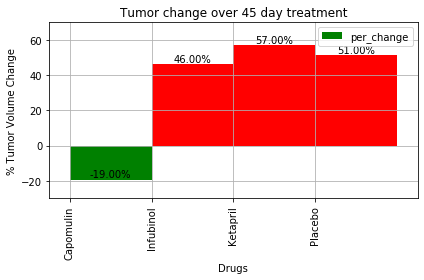

In [19]:
# Store all Relevant Percent Changes into a Tuple
graph_drugs = ['Capomulin','Infubinol','Ketapril','Placebo']
drug_colors = ['red','green']
mean_per

drugs = list(drug_name)
drugs


x_axis = np.arange(len(graph_drugs))

per_change = []
for i in range(len(graph_drugs)):
    for j in range(len(drugs)):
        if graph_drugs[i] == drugs[j]:
              per_change.append(per_change_means[j])      #getting percentage change of 4 drugs under study

#per_change

bar_df = pd.DataFrame({
      "Drugs":graph_drugs,"per_change":per_change
})


#plotting bar graph 

ax = bar_df.plot.bar(x='Drugs',y='per_change',color=np.where(bar_df["per_change"]>0, 'r', 'g'),width=1,align='edge')


#for i in range(len(per_change)):
#    my_color=np.where(per_change[i] > 0, 'orange', 'skyblue')
    
#plt.bar(x = x_axis,height = per_change, color='r',alpha = 0.5,align='edge',width = -1)        
plt.grid()


# Orient widths. Add labels, tick marks, etc. 
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor change over 45 day treatment")
#plt.xticks(x_axis,graph_drugs)

# Use functions to label the percentages of changes
#for p in ax.patches:
#    p = (ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005)))
 
for p in ax.patches:
    height = p.get_height()
    #percent = ((height)) * 100
    percent=round(height,0)
    ax.text(p.get_x()+p.get_width()/2.,
           height + 0.25,
          '%.2f' % percent + "%", ha = "center", va = "bottom")
    #print(p)

# Call functions to implement the function calls
plt.ylim(-30,70)
plt.tight_layout()

# Save the Figure
plt.savefig("../Images/Summary_Barchart.png")
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)